In [2]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from ens_util import *
from math import isnan
from sklearn.calibration import calibration_curve
plt.rcParams['figure.figsize'] = [9,9]

In [3]:
data_files = glob('data_crop*.nc')
res_files = glob('2014*Z_crs_gauss.nc')

def lcc(lats, lons, R=6370, truelat0=31.7, truelat1=31.7,
                  ref_lat=31.68858, stand_lon=-113.7):
    """
    Taken from Tony Lorenzo's repository at:
    https://github.com/alorenzo175/
         satellite_irradiance_optimal_interpolation.git.
    Convert from spherical lats/lons like what comes out of WRF to the WRF
    Lambert Conformal x/y coordinates. Defaults are what
    are generally used for the AZ domain
    """
    phis = np.radians(lats)
    lambdas = np.radians(lons)
    phi0 = np.radians(ref_lat)
    phi1 = np.radians(truelat0)
    phi2 = np.radians(truelat1)
    lambda0 = np.radians(stand_lon)

    if truelat0 == truelat1:
        n = np.sin(phi0)
    else:
        n = (np.log(np.cos(phi1) / np.cos(phi2)) /
             np.log(np.tan(np.pi / 4 + phi2 / 2) /
                    np.tan(np.pi / 4 + phi1 / 2)
                    ))
    F = (np.cos(phi1) * np.power(np.tan(np.pi / 4 + phi1 / 2), n) / n)
    rho0 = F / np.power(np.tan(np.pi / 4 + phi0 / 2), n)
    rho = F / np.power(np.tan(np.pi / 4 + phis / 2), n)
    x = R * rho * np.sin(n * (lambdas - lambda0))
    y = R * (rho0 - rho * np.cos(n * (lambdas - lambda0)))

    return round(x,1),round(y,1)

In [4]:
#print(lcc(32.37,-111.24))
#print(lcc(32.37,-111.28))
print(lcc(32.381,-111.054))
print(lcc(32.271,-110.877))

lat = [32.370522,32.372169,32.105007,32.103264,32.117565,32.101406,32.099697,
       32.107296,32.142822,35.022871,32.191449,34.297182,35.239405,32.033751,
       31.555180,32.236389,32.033751,31.496393,35.303131,32.101040,35.342665]
long = [-111.241783,-111.282875,-110.822395,-110.818794,
        -110.819511,-110.815613,-110.811325,-110.824539,
        -110.877073,-114.162059,-110.862375,-109.266867,
        -114.039004,-110.962391,-110.319957,-110.141944,
        -110.962391,-111.006983,-114.013827,-110.821436,-113.907816]
#lat = []
#long = 

(248.4, 80.0)
(265.4, 68.2)


In [5]:
for i in range(len(lat)):
    x,y = lcc(lat[i],long[i])
    if(y>32 and y<88 and x>240 and x<280):
        print(x,y,i+1)
    else:
        print(x,y,'out',i+1)
# Include first two at x=240, collapse into single point. 

230.8 78.4 out 1
227.0 78.5 out 2
271.0 49.9 3
271.3 49.7 4
271.2 51.3 5
271.6 49.5 6
272.0 49.3 7
270.8 50.1 8
265.7 53.9 9
-42.1 371.0 out 10
267.0 59.4 11
407.5 298.4 out 12
-30.8 395.1 out 13
258.0 41.6 14
320.2 -9.9 out 15
334.6 66.4 out 16
258.0 41.6 17
255.3 -18.2 out 18
-28.5 402.2 out 19
271.1 49.4 20
-18.9 406.5 out 21


In [6]:
coordx = [240,258,266,267,271,271,271,272]
coordy = [78,42,54,59,49,50,51,49]
for x in range(248,266):
    for y in range(68,81):
        coordx.append(x)
        coordy.append(y)

#weights = np.array([59,49.87,13,2.5,2.04,13.7,5,8])
weights = np.array(len(coordx)*[1])
thresh = 0.2
data = build_datadf(data_files,coordx,coordy)
(fr15,fr30,fr45,fr60) = build_solar_fractions(res_files,data.index,weights,data.columns,coordx,coordy,thresh)

solar fractions
20140402_1630Z_crs_gauss.nc
20140402_1645Z_crs_gauss.nc
20140402_1700Z_crs_gauss.nc
20140402_1715Z_crs_gauss.nc
20140402_1730Z_crs_gauss.nc
20140402_1745Z_crs_gauss.nc
20140402_1800Z_crs_gauss.nc
20140402_1830Z_crs_gauss.nc
20140402_1845Z_crs_gauss.nc
20140402_1900Z_crs_gauss.nc
20140402_1915Z_crs_gauss.nc
20140402_1930Z_crs_gauss.nc
20140402_1945Z_crs_gauss.nc
20140402_2000Z_crs_gauss.nc
20140402_2015Z_crs_gauss.nc
20140402_2030Z_crs_gauss.nc
20140402_2100Z_crs_gauss.nc
20140402_2130Z_crs_gauss.nc
20140402_2145Z_crs_gauss.nc
20140402_2200Z_crs_gauss.nc
20140402_2215Z_crs_gauss.nc
20140402_2230Z_crs_gauss.nc
20140405_1630Z_crs_gauss.nc
20140405_1645Z_crs_gauss.nc
20140405_1700Z_crs_gauss.nc
20140405_1715Z_crs_gauss.nc
20140405_1730Z_crs_gauss.nc
20140405_1745Z_crs_gauss.nc
20140405_1800Z_crs_gauss.nc
20140405_1830Z_crs_gauss.nc
20140405_1845Z_crs_gauss.nc
20140405_1900Z_crs_gauss.nc
20140405_1915Z_crs_gauss.nc
20140405_1930Z_crs_gauss.nc
20140405_1945Z_crs_gauss.nc
2014

20140426_1845Z_crs_gauss.nc
20140426_1900Z_crs_gauss.nc
20140426_1915Z_crs_gauss.nc
20140426_1930Z_crs_gauss.nc
20140426_1945Z_crs_gauss.nc
20140426_2000Z_crs_gauss.nc
20140426_2015Z_crs_gauss.nc
20140426_2030Z_crs_gauss.nc
20140426_2100Z_crs_gauss.nc
20140426_2130Z_crs_gauss.nc
20140426_2145Z_crs_gauss.nc
20140426_2200Z_crs_gauss.nc
20140426_2215Z_crs_gauss.nc
20140426_2230Z_crs_gauss.nc
20140505_1630Z_crs_gauss.nc
20140505_1645Z_crs_gauss.nc
20140505_1700Z_crs_gauss.nc
20140505_1715Z_crs_gauss.nc
20140505_1730Z_crs_gauss.nc
20140505_1745Z_crs_gauss.nc
20140505_1800Z_crs_gauss.nc
20140505_1830Z_crs_gauss.nc
20140505_1845Z_crs_gauss.nc
20140505_1900Z_crs_gauss.nc
20140505_1915Z_crs_gauss.nc
20140505_1930Z_crs_gauss.nc
20140505_1945Z_crs_gauss.nc
20140505_2000Z_crs_gauss.nc
20140505_2015Z_crs_gauss.nc
20140505_2030Z_crs_gauss.nc
20140505_2100Z_crs_gauss.nc
20140505_2130Z_crs_gauss.nc
20140505_2145Z_crs_gauss.nc
20140505_2200Z_crs_gauss.nc
20140505_2215Z_crs_gauss.nc
20140505_2230Z_crs_g

20140530_1830Z_crs_gauss.nc
20140530_1845Z_crs_gauss.nc
20140530_1900Z_crs_gauss.nc
20140530_1915Z_crs_gauss.nc
20140530_1930Z_crs_gauss.nc
20140530_1945Z_crs_gauss.nc
20140530_2000Z_crs_gauss.nc
20140530_2015Z_crs_gauss.nc
20140530_2030Z_crs_gauss.nc
20140530_2100Z_crs_gauss.nc
20140530_2130Z_crs_gauss.nc
20140530_2145Z_crs_gauss.nc
20140530_2200Z_crs_gauss.nc
20140530_2215Z_crs_gauss.nc
20140530_2230Z_crs_gauss.nc
20140603_1630Z_crs_gauss.nc
20140603_1645Z_crs_gauss.nc
20140603_1700Z_crs_gauss.nc
20140603_1715Z_crs_gauss.nc
20140603_1730Z_crs_gauss.nc
20140603_1745Z_crs_gauss.nc
20140603_1800Z_crs_gauss.nc
20140603_1830Z_crs_gauss.nc
20140603_1845Z_crs_gauss.nc
20140603_1900Z_crs_gauss.nc
20140603_1915Z_crs_gauss.nc
20140603_1930Z_crs_gauss.nc
20140603_1945Z_crs_gauss.nc
20140603_2000Z_crs_gauss.nc
20140603_2015Z_crs_gauss.nc
20140603_2030Z_crs_gauss.nc
20140603_2100Z_crs_gauss.nc
20140603_2130Z_crs_gauss.nc
20140603_2145Z_crs_gauss.nc
20140603_2200Z_crs_gauss.nc
20140603_2215Z_crs_g

In [7]:
data

,0,1,2,3,4,5,6,7,8,9,...,232,233,234,235,236,237,238,239,240,241
2014-04-02 16:30:00,0.052392,0.046716,0.034530,0.017588,0.021717,0.021739,0.022291,0.025657,0.026275,0.030295,...,0.016918,0.020666,0.020686,0.014859,0.015687,0.028351,0.028370,0.017908,0.007492,0.003415
2014-04-02 16:45:00,0.014934,0.010807,0.030107,0.025935,0.029932,0.029954,0.015388,0.016726,0.014321,0.003657,...,0.027096,0.014083,0.014101,0.022122,0.019081,0.031166,0.031184,0.012520,0.006641,0.012669
2014-04-02 17:00:00,0.011964,0.020213,0.025875,0.023206,0.028679,0.028701,0.022170,0.014695,0.023326,0.022287,...,0.006591,0.022244,0.022262,0.017411,0.019455,0.039136,0.039155,0.018309,0.016991,0.008847
2014-04-02 17:15:00,0.030484,0.007607,0.021328,0.020008,0.020464,0.020482,0.018376,0.022304,0.025311,0.025808,...,0.022069,0.009377,0.009393,0.020946,0.014783,0.028808,0.028826,0.018583,0.015519,0.020349
2014-04-02 17:30:00,0.017417,0.017224,0.024618,0.025634,0.023998,0.024018,0.059613,0.019509,0.034025,0.035194,...,0.025679,0.010074,0.010090,0.017159,0.022479,0.029388,0.029405,0.035818,0.062682,0.069639
2014-04-02 17:45:00,0.032091,0.013219,0.029577,0.036241,0.042842,0.042863,0.047227,0.041787,0.032663,0.040760,...,0.072658,0.085998,0.086019,0.037072,0.033881,0.032069,0.032086,0.028504,0.025899,0.013810
2014-04-02 18:00:00,0.068815,0.027844,0.051685,0.061344,0.031249,0.031269,0.031329,0.023185,0.053191,0.035368,...,0.023208,0.045789,0.045808,0.035580,0.053565,0.055279,0.055297,0.161908,0.127444,0.097515
2014-04-02 18:30:00,0.134562,0.033759,0.031194,0.089525,0.044524,0.044545,0.042611,0.058576,0.039399,0.081112,...,0.049438,0.066621,0.066641,0.066092,0.062159,0.080549,0.080568,0.099590,0.136620,0.162874
2014-04-02 18:45:00,0.411591,0.024984,0.038472,0.058174,0.046509,0.046530,0.065857,0.063281,0.098701,0.130026,...,0.030280,0.031464,0.031483,0.034608,0.133949,0.170187,0.170210,0.161441,0.160238,0.177182
2014-04-02 19:00:00,0.180345,0.033036,0.059950,0.019475,0.045639,0.045662,0.040277,0.039151,0.093163,0.177615,...,0.068726,0.092004,0.092026,0.077515,0.068084,0.152532,0.152555,0.217135,0.230159,0.216577


In [8]:
data_sol = pd.DataFrame(index=data.index,columns=[0])
for t in data.index:
    weighted = np.multiply(data.loc[t].values,weights)
    avg = np.sum(weighted)/np.sum(weights)
    if(avg<0): avg=0
    data_sol.at[t]=avg
fr = [fr15,fr30,fr45,fr60]
data = data_sol

In [9]:
index_dates = data.index.date
index_dates_unique = np.unique(index_dates)
index_times = data.index
bs15 = pd.DataFrame(index=index_dates_unique,columns=data.columns)
bs30 = pd.DataFrame(index=index_dates_unique,columns=data.columns)
bs45 = pd.DataFrame(index=index_dates_unique,columns=data.columns)
bs60 = pd.DataFrame(index=index_dates_unique,columns=data.columns)
bs = [bs15,bs30,bs45,bs60]

data_bin = data.mask(data<thresh,other=1)
data_bin = data_bin.mask(data_bin!=1.0,other=0)

for c in data.columns:
    for d in index_dates_unique:
        times = index_times[np.where(index_dates==d)]
        sat = data_bin.loc[times,[c]]
        for f in range(4):
            frac = fr[f].loc[times,[c]]
            bs_vals = ((frac-sat)**2).values[:,0].astype(np.float)
            valid = np.where(np.invert(np.isnan(bs_vals)))
            bs[f].at[d,c] = np.sum(bs_vals[valid])/len(bs_vals[valid])
            
dec15 = pd.DataFrame(index=index_dates_unique,columns=['rel','res','sig','bs'])
dec30 = pd.DataFrame(index=index_dates_unique,columns=['rel','res','sig','bs'])
dec45 = pd.DataFrame(index=index_dates_unique,columns=['rel','res','sig','bs'])
dec60 = pd.DataFrame(index=index_dates_unique,columns=['rel','res','sig','bs'])
dec = [dec15,dec30,dec45,dec60]

c=0
for d in index_dates_unique:
    times = index_times[np.where(index_dates==d)]
    sat = data_bin.loc[times,[c]]
    for f in range(4):
        frac = fr[f].loc[times,[c]]
        bs_vals = ((frac-sat)**2).values[:,0].astype(np.float)
        sat_vals = sat.values[:,0].astype(np.float)
        frac_vals = frac.values[:,0].astype(np.float)
        valid = np.where(np.invert(np.isnan(bs_vals)))
        bs_valid = bs_vals[valid]
        sat_valid = sat_vals[valid]
        frac_valid = frac_vals[valid]
        
        unique,counts = np.unique(frac_valid,return_counts=True)
        n = np.sum(counts)
        obar_i = np.zeros(len(unique))
        for j in range(len(unique)):
            y = unique[j]
            wh = np.where(frac_valid==y)
            obar_i[j] = np.sum(sat_valid[wh])/counts[j]
        obar = np.sum(sat_valid)/n

        sig = obar*(1-obar)
        rel = np.sum(np.multiply(counts,(unique-obar_i)**2))/n
        res = np.sum(np.multiply(counts,(obar_i-obar)**2))/n
        dec[f].at[d,'rel'] = rel
        dec[f].at[d,'res'] = res
        dec[f].at[d,'sig'] = sig
        dec[f].at[d,'bs'] = rel-res+sig


In [10]:
avg_ci = [0.07326633937050787, 0.20778712302975885, 0.11192718638706237, 0.06896607381887883, 0.14332269534242617, 0.25472343970477335, 0.04777688933358877, 0.8596485152665307, 0.19564074560864855, 0.06170793115020668, 0.021583633585999476, 0.03259704694624734, 0.03989605709146575, 0.5405269801579695, 0.013546266323385918, 0.06124534490048805, 0.05463109817092926, 0.03606780100144922, 0.0638700738320475, 0.03620355300317931, 0.04244338007354623, 0.009881199632866159, 0.033942529421483604, 0.009342719017178461, 0.05944429052055939, 0.10105394353402507, 0.6654091999523657, 0.0021613105745977136, 0.013400553711767014, 0.017006162006099224, 0.09350540001254598, 0.10001397910002892, 0.006636670686108557, 0.09580385996389294, 0.08552496468202024, 0.16219456934530282, 0.10637936657699525, 0.017298070474985355, 0.0015729371576519585]

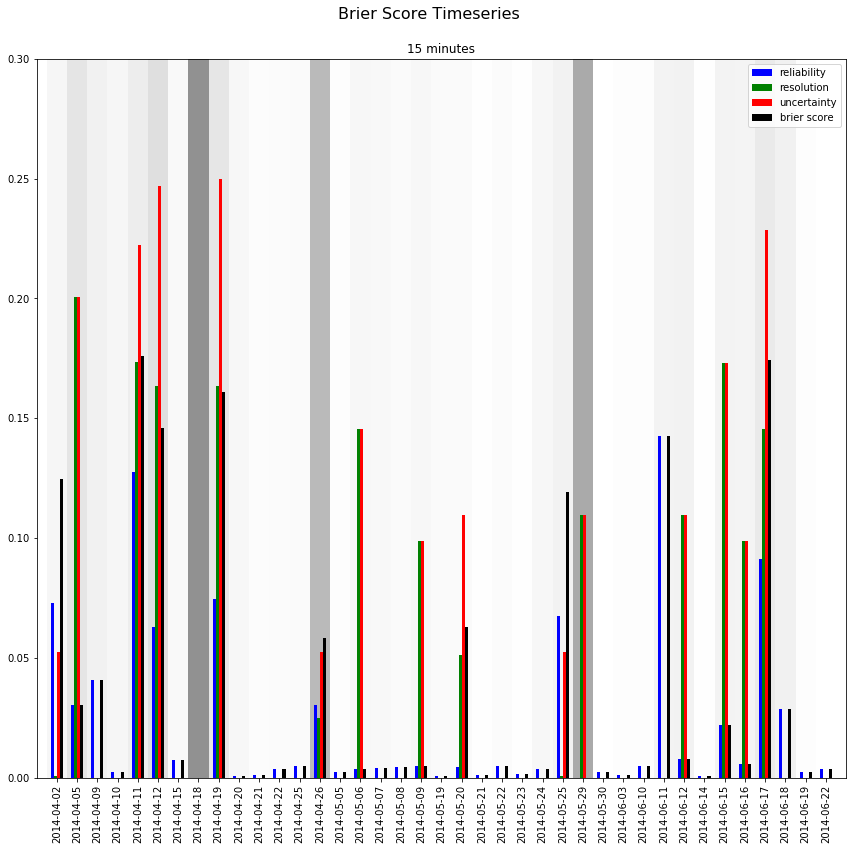

In [12]:
plt.rcParams['figure.figsize'] = [12,12]
ymin= 0
ymax = 0.3
rows = 1; cols = 1;

x = list(dec15.index)
xpos = np.array(range(len(x)))+1
width = 0.15
dx = width/2

fig,ax = plt.subplots(rows,cols)
ax.set_ylim([ymin,ymax])
ax.set_xlim([0,len(xpos)+1])
ax.set_xticks(xpos)
ax.set_xticklabels(x,rotation='vertical')

ax.bar(xpos-3*dx,dec15.values[:,0],width=width,color='b',label='reliability')
ax.bar(xpos-dx,dec15.values[:,1],width=width,color='g',label='resolution')
ax.bar(xpos+dx,dec15.values[:,2],width=width,color='r',label='uncertainty')
ax.bar(xpos+3*dx,dec15.values[:,3],width=width,color='k',label='brier score')

for i in range(1,len(x)+1):
    alpha = 0.5*avg_ci[i-1]
    ax.fill_between(np.arange(i-0.5,i+0.501,0.1),0,0.3,facecolor='k',alpha=alpha)

ax.set_title("15 minutes")

#fig.autofmt_xdate()
fig.tight_layout()
fig.suptitle("Brier Score Timeseries",fontsize=16)
fig.subplots_adjust(top=0.92)
plt.legend()
plt.show()

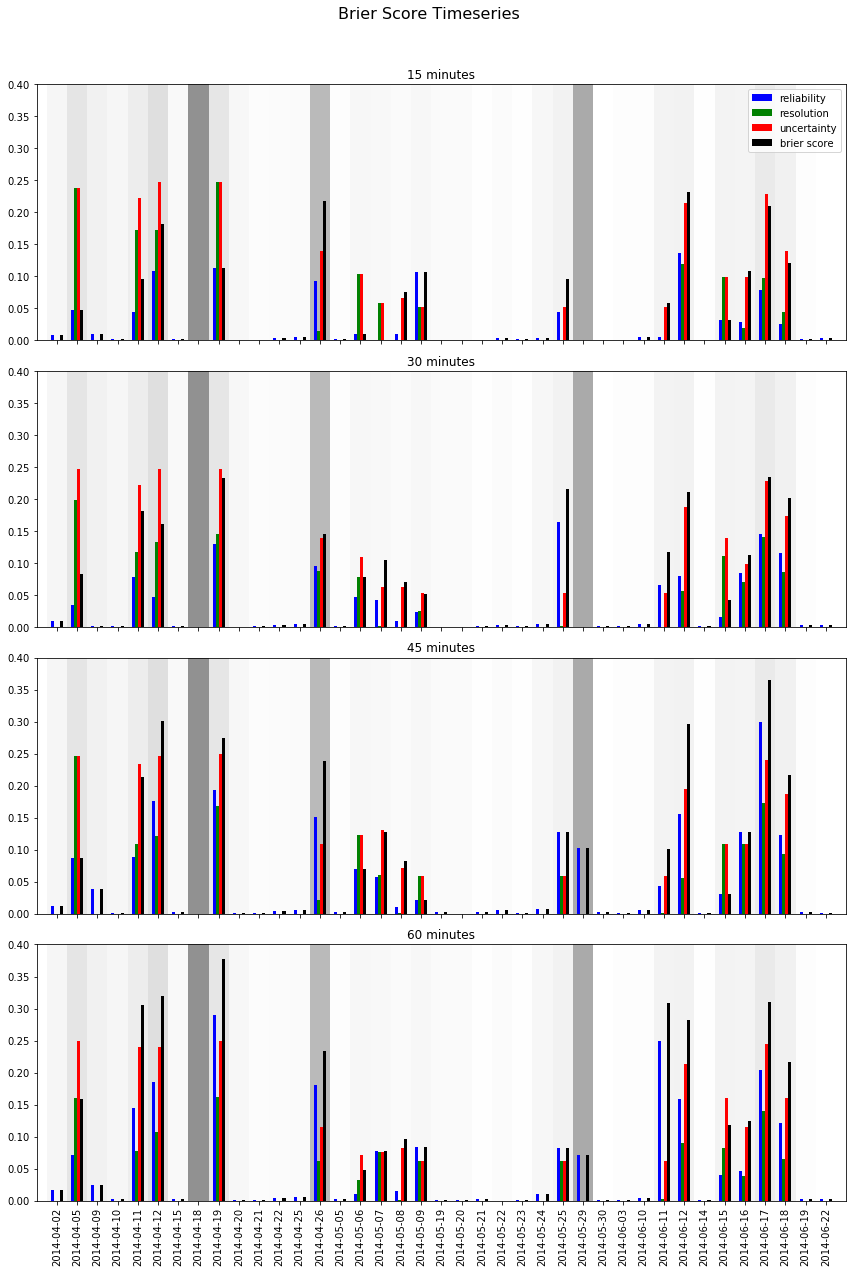

In [11]:
plt.rcParams['figure.figsize'] = [12,18]
ymin= 0
ymax = 0.4
rows = 4; cols = 1;
fig,ax = plt.subplots(rows,cols,sharex=True)
for r in range(rows):
    for c in range(cols):
        ax[r].set_ylim([ymin,ymax])
        ax[r].set_xlim([0,len(xpos)+1])
        ax[r].set_xticks(xpos)
        ax[r].set_xticklabels(x,rotation='vertical')
        
ax[0].bar(xpos-3*dx,dec15.values[:,0],width=width,color='b',label='reliability')
ax[0].bar(xpos-dx,dec15.values[:,1],width=width,color='g',label='resolution')
ax[0].bar(xpos+dx,dec15.values[:,2],width=width,color='r',label='uncertainty')
ax[0].bar(xpos+3*dx,dec15.values[:,3],width=width,color='k',label='brier score')

ax[1].bar(xpos-3*dx,dec30.values[:,0],width=width,color='b',label='reliability')
ax[1].bar(xpos-dx,dec30.values[:,1],width=width,color='g',label='resolution')
ax[1].bar(xpos+dx,dec30.values[:,2],width=width,color='r',label='uncertainty')
ax[1].bar(xpos+3*dx,dec30.values[:,3],width=width,color='k',label='brier score')

ax[2].bar(xpos-3*dx,dec45.values[:,0],width=width,color='b',label='reliability')
ax[2].bar(xpos-dx,dec45.values[:,1],width=width,color='g',label='resolution')
ax[2].bar(xpos+dx,dec45.values[:,2],width=width,color='r',label='uncertainty')
ax[2].bar(xpos+3*dx,dec45.values[:,3],width=width,color='k',label='brier score')

ax[3].bar(xpos-3*dx,dec60.values[:,0],width=width,color='b',label='reliability')
ax[3].bar(xpos-dx,dec60.values[:,1],width=width,color='g',label='resolution')
ax[3].bar(xpos+dx,dec60.values[:,2],width=width,color='r',label='uncertainty')
ax[3].bar(xpos+3*dx,dec60.values[:,3],width=width,color='k',label='brier score')

for a in range(4):
    for i in range(1,len(x)+1):
        alpha = 0.5*avg_ci[i-1]
        ax[a].fill_between(np.arange(i-0.5,i+0.501,0.1),0,0.6,facecolor='k',alpha=alpha)

ax[0].set_title("15 minutes")
ax[1].set_title("30 minutes")
ax[2].set_title("45 minutes")
ax[3].set_title("60 minutes")

ax[0].legend()

#fig.autofmt_xdate()
fig.tight_layout()
fig.suptitle("Brier Score Timeseries",fontsize=16)
fig.subplots_adjust(top=0.92)
plt.show()

In [13]:
c=0

index_dates = data.index.date
index_dates_unique = np.unique(index_dates)
index_times = data.index

data_bin = data.mask(data<thresh,other=1)
data_bin = data_bin.mask(data_bin!=1.0,other=0)

sat = data_bin.loc[:,[c]]
for f in range(4):
    frac = fr[f].loc[:,[c]]
    bs_df = ((frac-sat)**2)
    times = bs_df.index.values
    bs_vals = bs_df.values[:,0].astype(np.float)
    valid = np.where(np.invert(np.isnan(bs_vals)))
    bs_valid = bs_vals[valid]
    valid_times = times[valid]
    sat_vals = sat.loc[valid_times,[c]].values[:,0]
    obar = np.sum(sat_vals)/len(sat_vals)
    
    brier = np.sum(bs_valid)/len(bs_valid)
    print((f+1)*15,'minutes :',brier)
    #print('BS = ',brier)
    #print('obar = ',obar)

15 minutes : 0.03598214285714286
30 minutes : 0.05581473214285714
45 minutes : 0.05418614357262104
60 minutes : 0.06950361010830323


In [14]:
coord = 0
ytrue = data_bin[0].values.astype(np.float)

yprob15 = fr15.loc[data_bin.index.values].values[:,coord].astype(np.float)
yprob30 = fr30.loc[data_bin.index.values].values[:,coord].astype(np.float)
yprob45 = fr45.loc[data_bin.index.values].values[:,coord].astype(np.float)
yprob60 = fr60.loc[data_bin.index.values].values[:,coord].astype(np.float)

valid15 = [i for i in range(len(yprob15)) if not np.isnan(yprob15[i])]
valid30 = [i for i in range(len(yprob30)) if not np.isnan(yprob30[i])]
valid45 = [i for i in range(len(yprob45)) if not np.isnan(yprob45[i])]
valid60 = [i for i in range(len(yprob60)) if not np.isnan(yprob60[i])]

ptrue15,ppred15 = calibration_curve(ytrue[valid15],yprob15[valid15])
ptrue30,ppred30 = calibration_curve(ytrue[valid30],yprob30[valid30])
ptrue45,ppred45 = calibration_curve(ytrue[valid45],yprob45[valid45])
ptrue60,ppred60 = calibration_curve(ytrue[valid60],yprob60[valid60])


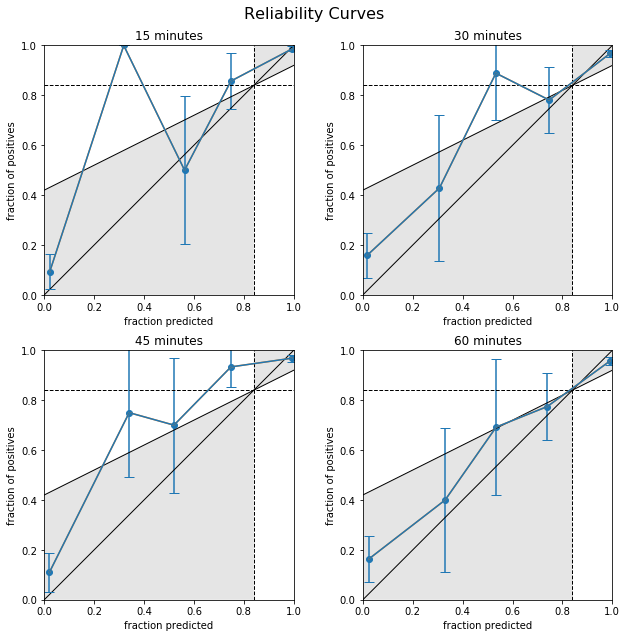

In [15]:
plt.rcParams['figure.figsize'] = [9, 9]

obar = 0.84 # similar obar for all outlook times

xmin = 0
ymin = xmin
xmax = 1
ymax = xmax
x = [xmin,xmax]
y = [ymin,ymax]
nsy = [obar/2,(1+obar)/2]
rows = 2; cols = 2;
fig,axarr = plt.subplots(rows,cols)
for r in range(rows):
    for c in range(cols):
        axarr[r,c].set_aspect('equal','box')
        axarr[r,c].axis([xmin,xmax,ymin,ymax])
        axarr[r,c].plot(x,y,c='k',lw=1)
        axarr[r,c].set_xlabel("fraction predicted")
        axarr[r,c].set_ylabel("fraction of positives")
        axarr[r,c].axhline(obar,ls='--',c='k',lw=1)
        axarr[r,c].axvline(obar,ls='--',c='k',lw=1)
        axarr[r,c].plot(x,nsy,c='k',lw=1)
        axarr[r,c].fill_between([0,obar],0,[obar/2,obar],facecolor='k',alpha=0.1)
        axarr[r,c].fill_between([obar,1],[obar,(1+obar)/2],1,facecolor='k',alpha=0.1)

        
n = np.array([64,11,11,37,549])
err15 = 1.96*np.sqrt(ptrue15*(1-ptrue15)/n)
err30 = 1.96*np.sqrt(ptrue30*(1-ptrue30)/n)
err45 = 1.96*np.sqrt(ptrue45*(1-ptrue45)/n)
err60 = 1.96*np.sqrt(ptrue60*(1-ptrue60)/n)        
        
axarr[0,0].scatter(ppred15,ptrue15)
axarr[0,0].errorbar(ppred15,ptrue15,err15,capsize=5)
axarr[0,0].plot(ppred15,ptrue15)

axarr[0,1].scatter(ppred30,ptrue30)
axarr[0,1].errorbar(ppred30,ptrue30,err30,capsize=5)
axarr[0,1].plot(ppred30,ptrue30)

axarr[1,0].scatter(ppred45,ptrue45)
axarr[1,0].errorbar(ppred45,ptrue45,err45,capsize=5)
axarr[1,0].plot(ppred45,ptrue45)

axarr[1,1].scatter(ppred60,ptrue60)
axarr[1,1].errorbar(ppred60,ptrue60,err60,capsize=5)
axarr[1,1].plot(ppred60,ptrue60)

axarr[0,0].set_title("15 minutes")
axarr[0,1].set_title("30 minutes")
axarr[1,0].set_title("45 minutes")
axarr[1,1].set_title("60 minutes")

fig.tight_layout()
fig.suptitle("Reliability Curves",fontsize=16)
fig.subplots_adjust(top=0.92)
plt.show()

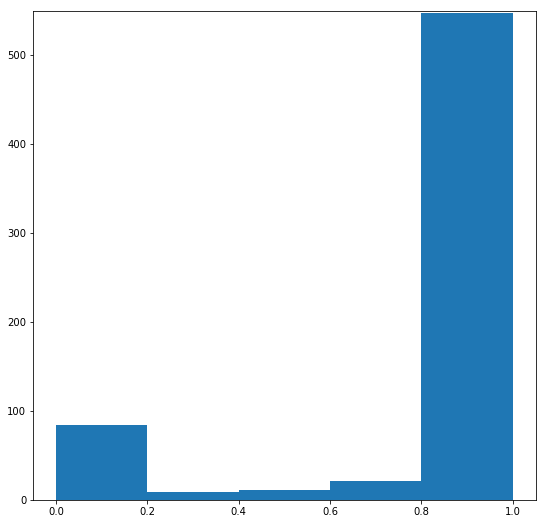

[ 84.   9.  11.  21. 547.]


In [17]:
n = plt.hist(yprob30[valid30],bins=5)
plt.ylim([0,550])
plt.show()
print(n[0])